In [1]:
import numpy as np
import torch

from sklearn.model_selection import train_test_split
from kan import *

In [2]:
gravity = 9.81
distance = np.linspace(5, 20, 100)
height = np.linspace(5, 20, 100)

In [3]:
velocity = np.log((gravity * distance**2).reshape(-1,1) / (2*height).reshape(1, -1).flatten())
inputs = np.array([[(d/20)**2, l/20] for d in distance for l in height])

train_input, test_input, train_label, test_label = train_test_split(inputs, velocity.reshape(-1,1), test_size=0.2, random_state=0)
dataset = {
    "train_input": torch.from_numpy(train_input).float(),
    "train_label": torch.from_numpy(train_label).float(),
    "test_input": torch.from_numpy(test_input).float(),
    "test_label": torch.from_numpy(test_label).float()
}

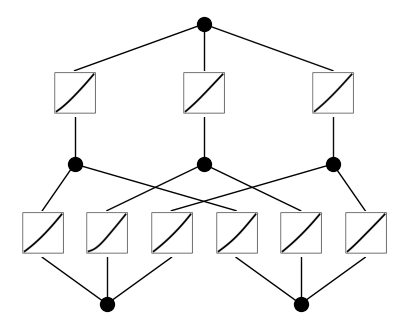

In [4]:
# plot KAN at initialization
model = KAN(width=[2,3,1], grid=5, k=3, seed=0)
model(dataset['train_input']);
model.plot(beta=100)

In [5]:
model.train(dataset, opt="LBFGS", steps=10, lamb=0.01, lamb_entropy=10.);

train loss: 7.70e-02 | test loss: 7.57e-02 | reg: 1.11e+01 : 100%|██| 10/10 [00:05<00:00,  1.91it/s]


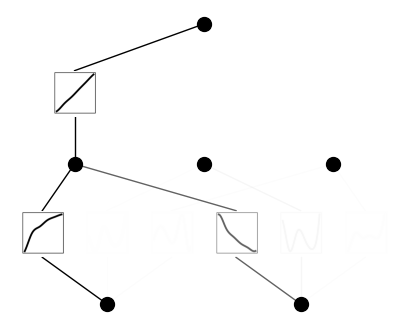

In [6]:
model.plot()

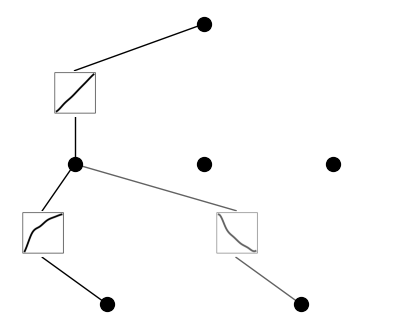

In [7]:
model.prune()
model.plot(mask=True)

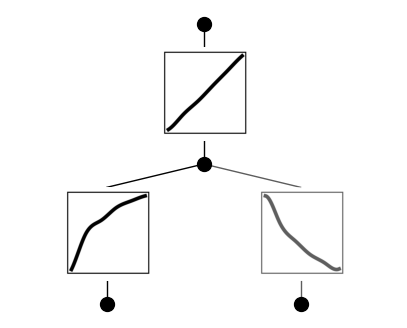

In [8]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [9]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 9.43e-04 | test loss: 9.27e-04 | reg: 4.44e+00 : 100%|██| 50/50 [00:08<00:00,  6.00it/s]


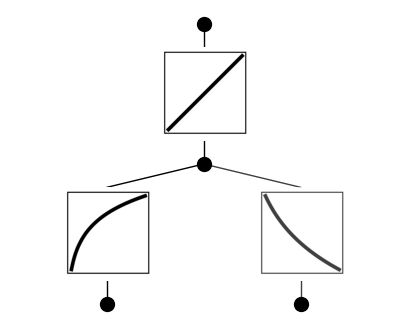

In [10]:
model.plot()

In [12]:
model.auto_symbolic()

fixing (0,0,0) with log, r2=0.9999989867210388
fixing (0,1,0) with log, r2=1.0000003576278687
fixing (1,0,0) with x, r2=1.0000003576278687


In [13]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 4.50e-07 | test loss: 4.64e-07 | reg: 4.44e+00 : 100%|██| 50/50 [00:03<00:00, 14.46it/s]


In [14]:
model.symbolic_formula()[0][0]

1.0*log(2.9*x_1) - 1.0*log(2.42*x_2) + 4.41

In [15]:
np.log(9.81) + np.log(400) - np.log(2) - np.log(20)

4.5859873665713184

In [16]:
np.log(2.9) - np.log(2.42) + 4.41

4.590943196823833